# TIM - TP8 : Récapitulatif des séances pratiques + Examen Blanc

Aujourd'hui, la séance est 2 parties et est faite pour vous préparer à l'examen pratique en janvier. Ce TP n'est pas à rendre non plus : en 4A, vous êtes grands, donc je vous laisse décider pour vous.

Un dépôt sera disponible et vous pourrez déposer votre TP si vous voulez un retour perso sur le travail effectué (en fonction du temps que je pourrais y consacrer...).

C'est parti !

## Section 1 : Le récapitulatif

Lors de ces derniers séances et de vos différents projets, vous avez développé et utilisé plusieurs algorithmes de Traitement d'Images, mais le plus important ici est de savoir les appliquer en fonction de ce qu'on veut obtenir de notre image.

Cette première partie vise donc à faire un récapitulatif de tous les algorithmes qu'on a pu voir durant les séances précédentes (hormis la séance Deep Learning).

Compléter donc le tableau suivant, histoire d'avoir de côté un bon récapitulatif rapide à comprendre ;) Je n'ai mis ici que les fonctions de traitement d'images (et non les fonctions utiles comme la lecture d'image, l'affichage, etc.). Vous pouvez le compléter à votre convénience.

*Note :* Vous ne trouverez pas ce tableau complété dans la correction de ce TP. En effet, c'est à vous de faire le travail, et pas à moi ;) En revanche, si vous voulez un retour sur ce que vous avez rempli, rendez ce TP dans le dépôt prévu à cet effet, et je vous répondrai sans problème...

| Algorithme | N° du TP ou Projet où on a pu le voir | Utilité | Fonction Python (+ package)|
| :------------: | :-------------: | :-------------: | :-------------: |
| Quantification N&B | ... | ... | ... |
| Histogramme | ... | ... | ... |
| Re-échantillonage | ... | ... | ... |
| Binarisation par seuillage | ... | ... | ... |
| Binarisation par extraction de fenêtre d'intensité | ... | ... | ... |
| Expansion de la dynamique | ... | ... | ... |
| Réhaussement de contraste | ... | ... | ... |
| Egalisation d'histogramme | ... | ... | ... |
| Bruitage S&P | ... | ... | ... |
| Bruitage Gaussien | ... | ... | ... |
| Filtre moyenneur | ... | ... | ... |
| Filtre médian | ... | ... | ... |
| Filtre gaussien | ... | ... | ... |
| Filtre exponentiel | ... | ... | ... |
| Dérivées directionelles | ... | ... | ... |
| Norme du gradient | ... | ... | ... |
| Filtre de Sobel | ... | ... | ... |
| Filtre de Prewitt | ... | ... | ... |
| Filtre Laplacien | ... | ... | ... |
| Différence de gaussiennes (DOG) | ... | ... | ... |
| Erosion (Morpho Math) | ... | ... | ... |
| Dilatation (Morpho Math) | ... | ... | ... |
| Ouverture (Morpho Math) | ... | ... | ... |
| Fermeture (Morpho Math) | ... | ... | ... |
| Gradient Morphologique (Morpho Math) | ... | ... | ... |
| Changement d'espaces de couleur | ... | ... | ... |
| Séléction et/ou changement de couleur | ... | ... | ... |
| Filtre de Canny | ... | ... | ... |
| Filtre de Canny-Deriche | ... | ... | ... |
| Reconnaissance de formes via Hough | ... | ... | ... |
| Caractéristiques de Haar | ... | ... | ... |
| Histogram of Gradients (HOG) | ... | ... | ... |
| Matrice de coocurrence | ... | ... | ... |
| Calcul de l'énergie/l'entropie/le contraste/la variance d'une image | ... | ... | ... |
| SIFT | ... | ... | ... |
| ORB | ... | ... | ... |

## Section 2 : L'examen blanc

Pour cette partie, voici un exercice du même style que ce qu'on pourra vous donner lors de l'examen pratique. Celui-ci sera décomposé en 2 parties principales : un exercice d'implémentation pour que vous nous montriez vos Python skills ;), et  un exercice d'analyse pour savoir comment vous utilisez les algorithmes à votre disposition. L'exercice ici est volontairement long, donc ne vous inquiétez pas si vous n'arrivez pas à le faire en 2h.

### Comptage de grains de riz (oui, on part sur une application très utile dans la vie...)

Eh oui, le but de cet exercice est de compter le nombre de grains de riz dans une image. Pour cela, l'exercice est décomposé en 3 parties :
- Le développement de l'algorithme de binarisation avec seuil automatique (Otsu)
- Le comptage de grains de riz et l'analyse du résultat obtenu
- Les propositions et implémentations de solutions pour améliorer le résultat précédemment obtenu.

### Partie 1 : Binarisation avec seuil automatique

Une fonction de binarisation vise à transformer une image en niveaux de gris en une image binaire. Dans la plupart des méthodes, les pixels dont les niveaux de gris sont inférieurs à une valeur seuil sont transformés en pixels noirs dans l'image résultat alors que les
autres sont transformés en pixels blancs. Mais comment choisir le meilleur seuil pour une
image donnée ? 

Il existe plusieurs méthodes dans la littérature permettant de déterminer automatiquement le seuil de binarisation. Une des plus connues est la méthode d'Otsu proposée en 1979. Cette méthode a pour hypothèse que les pixels se répartisse en 2 classes (objet et fond), relativement bien distinctes dans l'histogramme.

#### a) Le principe de l'algorithme d'Otsu

On considère une image $I$ de taille $l \times h$ dont les niveaux de gris appartiennent à $[0,L]$. On appelle $h$ l'histogramme d'amplitude défini de telle sorte que $h(n)$ donne le nombre de pixels de $I$ dont le niveau de gris vaut $n$.

La probabilité $p(n)$ a priori d'un niveau de gris $n$ est alors définie par
\begin{equation*}
    p(n) = \frac{h(n)}{l.h}
\end{equation*}

La fonction $p(x)$ est alors une densité de probabilité. En effet, on peut alors vérifier que
\begin{equation*}
    \sum_{n=0}^{L} p(n) = 1
\end{equation*}

Il est alors possible de déterminer la moyenne et la variance des niveaux de gris.
\begin{equation*}
    \mu = \sum_{n=0}^{L}n.p(n)
\end{equation*}

\begin{equation*}
    \sigma^2 = \sum_{n=0}^{L}(n-\mu)^2 p(n)
\end{equation*}

La méthode d'Otsu repose sur l'hypothèse que les pixels de l'image appartiennent à deux classes $C_{1}$ et $C_{2}$. Si on décide que les pixels appartiennent à $C_{1}$ si leur niveau est inférieur ou égal à t et appartiennent à $C_{2}$ sinon, on peut calculer la probabilité a priori de $C_{1}$ et $C_{2}$.
\begin{equation*}
    P(C_{1}) = \sum_{n=0}^{t} p(n)
\end{equation*}
\begin{equation*}
    P(C_{2}) = \sum_{n=t+1}^{L} p(n)
\end{equation*}

Les moyennes et variances des niveaux de gris de $C_{1}$ et $C_{2}$ sont alors donnés par
\begin{equation*}
    \mu_{C_{1}} = \frac{\sum_{n=0}^{t} n.p(n)}{P(C_{1})}
\end{equation*}
\begin{equation*}
    \mu_{C_{2}} = \frac{\sum_{n=t+1}^{L} n.p(n)}{P(C_{2})}
\end{equation*}
\begin{equation*}
    \sigma^2_{C_{1}} = \frac{\sum_{n=0}^{t}(n-\mu_{C_{1}})^2 p(n)}{P(C_{1})}
\end{equation*}
\begin{equation*}
    \sigma^2_{C_{2}} = \frac{\sum_{n=t+1}^{L}(n-\mu_{C_{2}})^2 p(n)}{P(C_{2})}
\end{equation*}

On montre que
\begin{equation*}
    \mu = \mu_{C_{1}}.P(C_{1})+\mu_{C_{2}}.P(C_{2})
\end{equation*}

Par ailleurs, on appelle $\sigma^2_{intra}$ la variance intraclasse et $\sigma^2_{inter}$ la variance interclasse définies par
\begin{equation*}
    \sigma^2_{intra} = P(C_{1})\sigma^2_{C_{1}} + P(C_{2})\sigma^2_{C_{2}}
\end{equation*}

\begin{equation*}
    \sigma^2_{inter} = P(C_{1})(\mu_{C_{1}}-\mu)^2+P(C_{2})(\mu_{C_{2}}-\mu)^2
\end{equation*}

On montre que
\begin{equation*}
    \sigma^2 = \sigma^2_{intra} + \sigma^2_{inter}
\end{equation*}

$\sigma^2$, la variance des niveaux de gris de l'image, est indépendante du seuil de binarisation. En revanche, $\sigma^2_{intra}$ et $\sigma^2_{inter}$ dépendent de la séparation en classes. Selon Otsu, la séparation optimale est obtenue en minimisant la variance intraclasse et en maximisant la variance interclasse. Or la somme de ces deux variances est constante, de ce fait, maximiser la variance interclasse est équivalent à minimiser la variance intraclasse. Le seuil idéal est alors obtenu pour le maximum de $\sigma^2_{inter}$ ou pour le minimum de $\sigma^2_{intra}$.
Toutes les valeurs de seuil possibles sont parcourues, et à chaque valeur possible, on calcule la variance $\sigma^2_{intra}$ ou la variance $\sigma^2_{inter}$, au choix, et on choisit le seuil $t$ tel que ces variances sont max ou min :

\begin{equation*}
    t_{opt} = arg \min_{t \in [0,255]} \sigma^2_{intra}(t) = arg \max_{t \in [0,255]} \sigma^2_{inter}(t)
\end{equation*}

#### b) L'algorithme d'Otsu en détail

C'est bien beau tout ce discours sur ce qu'est l'algorithme d'Otsu, mais on l'implémente comment ?

Pour cela, on va tout simplement calculer la variance interclasse pour toutes les valeurs de seuils possibles (allant du niveau de gris **minimum** actuel de l'image au niveau de gris **maximum** actuel de l'image).

**1)** Commencez déjà par implémenter une fonction permettant d'obtenir l'histogramme des niveaux de gris d'une image. On considèrera que notre image est de type uint8.

In [ ]:
# A compléter
# Fonction d'histogramme des niveaux de gris d'une image
...

**2)** Maintenant, créez une fonction calculant la probabilité qu'un pixel soit de valeur n dans notre image.

In [ ]:
# A compléter
# Fonction de calcul de la probabilité
...

**3)** On continue avec des fonctions assez simples. Tout de suite : l'implémentation du calcul de $\mu$ à partir de l'histogramme.

In [ ]:
# Calcul de mu
...

**4)** Implémentez ensuite une fonction de calcul de la variance interclasse d'une image à un seuil t donné.

In [ ]:
# A compléter
# Fonction de calcul de la variance interclasse
...

**5)** Maintenant, implémentez tout simplement la fonction de détermination du seuil automatique.

In [ ]:
# A compléter
# Fonction de détermination du seuil
...

**6)** On finit par implémenter la fonction de binarisation Otsu

In [ ]:
# A compléter
# Fonction de binarisation Otsu
...

**7)** Importez l'image rice.tif et affichez la

In [ ]:
# A compléter
# Import et affichage de l'image rice.tif
...

**8)** Appliquez la binarisation Otsu sur cette image et affichez le résultat

In [ ]:
# A compléter
# Binarisation Otsu et affichage du résultat
...

**9)** Comparez votre résultat avec la fonction proposée par OpenCV (cv2.threshold)

In [ ]:
# A compléter
# Comparaison du résultat de votre implémentation avec celui d'OpenCV
...

**_POUR LA SUITE DE L'EXERCICE :_** Si votre algorithme n'obtient pas le même résultat que celui proposé par OpenCV, **vous utiliserez la fonction d'OpenCV pour la suite**. Si vous avez bien implémenté l'algorithme, la binarisation Otsu devrait vous donner le résultat suivant : 

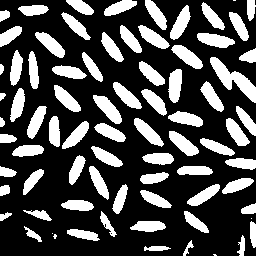

Dans le cas ultime où ni votre implémentation, ni l'utilisation de la fonction Otsu d'OpenCV ne vous donne ce résultat, **vous avez l'image résultat dans votre base d'image** (rice_bin.png). Il vous suffit donc de l'importer pour continuer le TP en toute tranquilité.

### Partie 2 : Le comptage de grains de riz

**10)** Maintenant, passons au moment le plus fun : le comptage des grains de riz ! On va le faire automatiquement évidemment. Pour cela, utilisez les fonctions regionsprops et label de skimage.measure, couplés avec label2rgb de skimage.color.

In [ ]:
from skimage.measure import regionprops,label
from skimage.color import label2rgb
from matplotlib import pyplot as plt

# Renseignez ici le nom de votre image binarisée, qu'on appelera pour le bout de code rice_bin
rice_bin = ...

# On labelise les régions de l'image binarisée (en gros les grains de riz quoi...)
labels = label(rice_bin)

# On récupère ensuite les données des régions labelisées
regions = regionprops(labels)

# Et là, on va créer une image bien sympathique
output = label2rgb(labels)
output[rice_bin==0]=0

plt.subplots(1,1,figsize=(10,10))
plt.imshow(output)
plt.title("Nombre de grains de riz comptés : {}".format(len(regions)))
plt.show()

**11)** Histoire d'aller plus loin, on a ici quelques soucis dans notre binarisation avec seuillage automatique. En effet, certains grains de riz ne sont pas détectés, et nous avons des régions mal labelisées, comme celles ci-dessous :

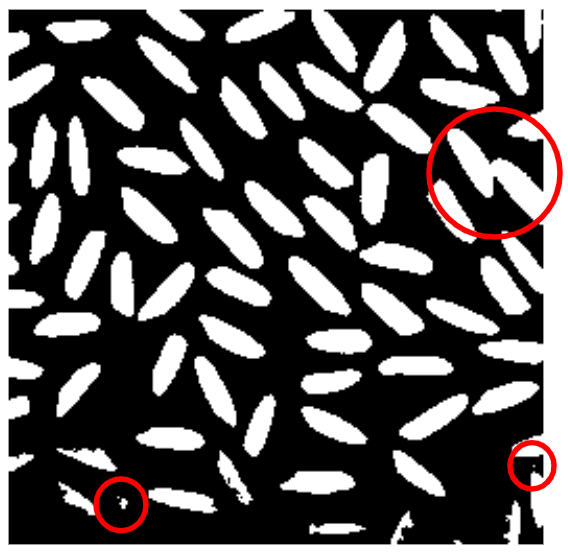

De plus, lors de la binarisation, nous avons perdu quelques grains de riz en bas de l'image. Il va donc falloir proposer des améliorations à notre algorithme de comptage.

### Partie 3 : Propositions et implémentations de solutions pour améliorer le résultat.

**12)** A partir des résultats obtenus avec la segmentation Otsu et le code de comptage qui vous est fourni, proposez une ou plusieurs solutions en pré-traitement, traitement ou post-traitement pour améliorer l'algorithme existant. En plus du code demandé, nous vous demandons une analyse avec explication des choix d'algorithmes et de paramètres. 

Cherchez déjà à comprendre le problème principal sur votre image qui fait que la segmentation Otsu ne fonctionne pas parfaitement. Pour cela, vous pouvez essayer temporairement plusieurs binarisations à différents seuils, et analyser le résultat.

*_Indice plus ou moins subtil :_* Faites abstraction des grains de riz...

**_Analyse des résultats et description du problème principal :_**

**_Solution(s) proposée(s) :_** 

**_Analyse de la ou les solution(s) proposée(s) :_**